## This project is the analysis of students' performance in IT for Business class in SolBridge International School of Business
### Analysis done by Gadelshin Egor (GitHub: Akori-Music)

## Course description
##### IT for Business course in SolBridge ISB is a course disigned to provide students with knowledge of essential technical skills and competencies including emailing, working with spreadsheets and documents, creating slides deck and generative AI. The syllabus PDF can be found in the repository.

##### Course also included a test for digital competences, which was taken at the beginning (Pre-test) and the end (Post-test) of the semester. However, this test was not calculated as a part of overall score.

##### Most important mention is the computation of overall grade for the course. It is presented as the table in the output of the following code.

In [1]:
# This part if code allows better visualisation for the score computation (taken directly from course's syllabus)
import pandas as pd
grades_data = {
    'Component': ['Attendance', 'Written reflections', 'Assignments', 'Final test', 'Final project', 'Total'],
    'Weight (%)': [20, 20, 30, 10, 20, 100]
}
grades_df = pd.DataFrame(grades_data)
grades_df

,Component,Weight (%)
0,Attendance,20
1,Written reflections,20
2,Assignments,30
3,Final test,10
4,Final project,20
5,Total,100


##### The dataset provider requested the analysis to answer the following questions:
##### 1) Did students' digital skills improve? (digital skills test, pre/post comparison)
##### 2.1) Can we say anything about the people who improved the most? (are there any characteristics about them that we can identify?)
##### 2.2) Can we say anything about the people who have high digital skills (from the post-test)? (are there any characteristics about them that we can identify?)
##### 3) How well do the digital skills post-test, DIQ test, and overall course grade correlate with each other?

## Part 00.
### Data predprocessing
##### This part of code is basic data preprocessing techniques which allow to get familiar with data and its components

In [2]:
# Importing essential libraries
# Pandas library was imported during previous step, therefore there is no need to include it now
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
# Importing the data and showing first 5 rows
df = pd.read_csv('Student data.csv')
df.head()

,Student ID,Section,Pre-test: Overall,Pre-test: Information and data literacy,Pre-test: Communication and collaboration,Pre-test: Digital content creation,Pre-test: Safety,Pre-test: Problem solving,Post-test: Overall,Post-test: Information and data literacy,Post-test: Communication and collaboration,Post-test: Digital content creation,Post-test: Safety,Post-test: Problem solving,Attendance,Reflections,Assignments,Final test,Final project,Overall
0,119,1,2.0,3.0,2.0,2.0,1.0,4.0,5.0,6.0,5.0,3.0,4.0,6.0,19,18.1,27.3,7.5,14.5,86.4
1,146,1,6.0,6.0,5.0,5.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,8,16.3,29.1,7.6,14.5,75.5
2,136,1,3.0,4.0,2.0,3.0,4.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,16,18.1,24.3,6.6,10.3,75.3
3,111,1,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,16,20.0,24.3,5.6,9.7,75.6
4,171,1,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,16,16.3,24.0,5.3,9.7,71.3


In [4]:
# Depicting the datas shape: Number of rows (unique students) and columns (score categories)
df.shape

(99, 20)

In [5]:
# Depicting score categories' names
df.columns

Index(['Student ID', 'Section', 'Pre-test: Overall',
       'Pre-test: Information and data literacy',
       'Pre-test: Communication and collaboration',
       'Pre-test: Digital content creation', 'Pre-test: Safety',
       'Pre-test: Problem solving', 'Post-test: Overall',
       'Post-test: Information and data literacy',
       'Post-test: Communication and collaboration',
       'Post-test: Digital content creation', 'Post-test: Safety',
       'Post-test: Problem solving', 'Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project', 'Overall'],
      dtype='object')

In [6]:
# Running basic statistical analysis of the dataset
df.describe()

,Student ID,Section,Pre-test: Overall,Pre-test: Information and data literacy,Pre-test: Communication and collaboration,Pre-test: Digital content creation,Pre-test: Safety,Pre-test: Problem solving,Post-test: Overall,Post-test: Information and data literacy,Post-test: Communication and collaboration,Post-test: Digital content creation,Post-test: Safety,Post-test: Problem solving,Attendance,Reflections,Assignments,Final test,Final project,Overall
count,99.000000,99.000000,94.000000,95.000000,95.000000,95.000000,95.000000,94.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,150.000000,1.929293,3.861702,4.094737,3.821053,3.536842,3.684211,4.010638,4.600000,4.693333,4.546667,4.240000,4.613333,4.773333,14.939394,16.325253,23.864646,6.265657,12.311111,73.706061
std,28.722813,0.798628,1.291836,1.459187,1.352531,1.507503,1.664799,1.387306,1.345664,1.559395,1.509370,1.478129,1.422724,1.381082,5.839378,3.953669,6.351849,1.979804,4.677386,19.113505
min,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.500000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,14.950000,22.400000,5.800000,9.900000,66.950000
50%,150.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,16.000000,18.100000,25.900000,6.600000,12.700000,77.900000
75%,174.500000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,20.000000,18.550000,28.100000,7.600000,15.300000,86.600000
max,199.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,20.000000,20.000000,30.000000,9.000000,19.700000,97.200000


Text(0.5, 1.0, 'Missing values in the dataset')

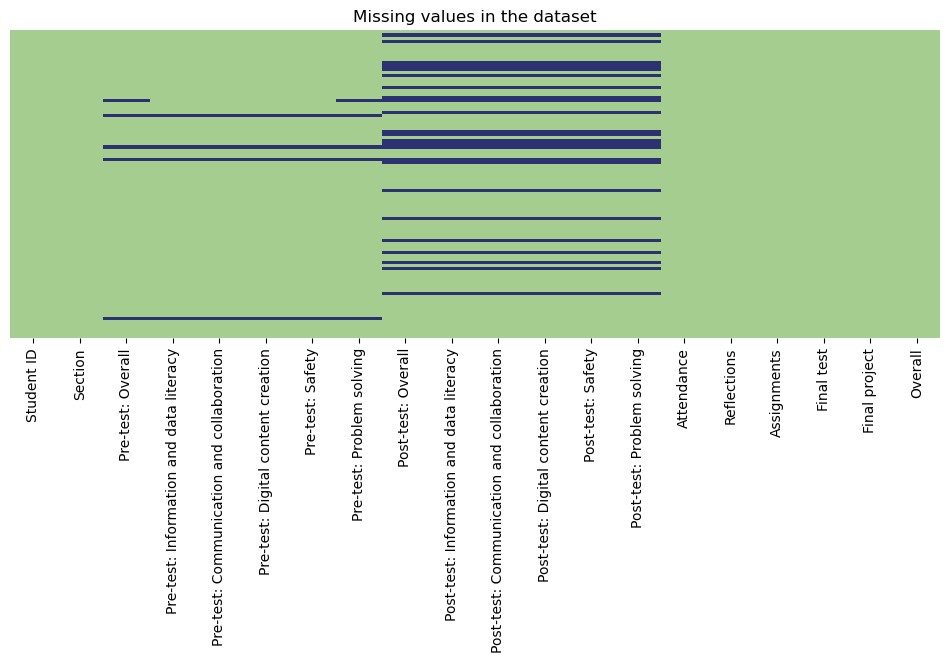

In [7]:
# Analysing missing values
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False, cmap='crest', yticklabels=False)
plt.title('Missing values in the dataset')

##### The amount of missing values is high in Pre-test and Post-test categories, as students did not finish/submit their work. After discussion with dataset provider, it was decided to get rid of the rows containing missing values, as replacing might lead to wrong results in the analysis

In [8]:
# Replacing dataset with its 'clean' version (without missing values)
df_cleaned = df.dropna()

# P. S. Cleaned dataset will be further referred to as the Original dataset

## Part 01.
### Did students' digital skills improve? (digital skills test, pre/post comparison)

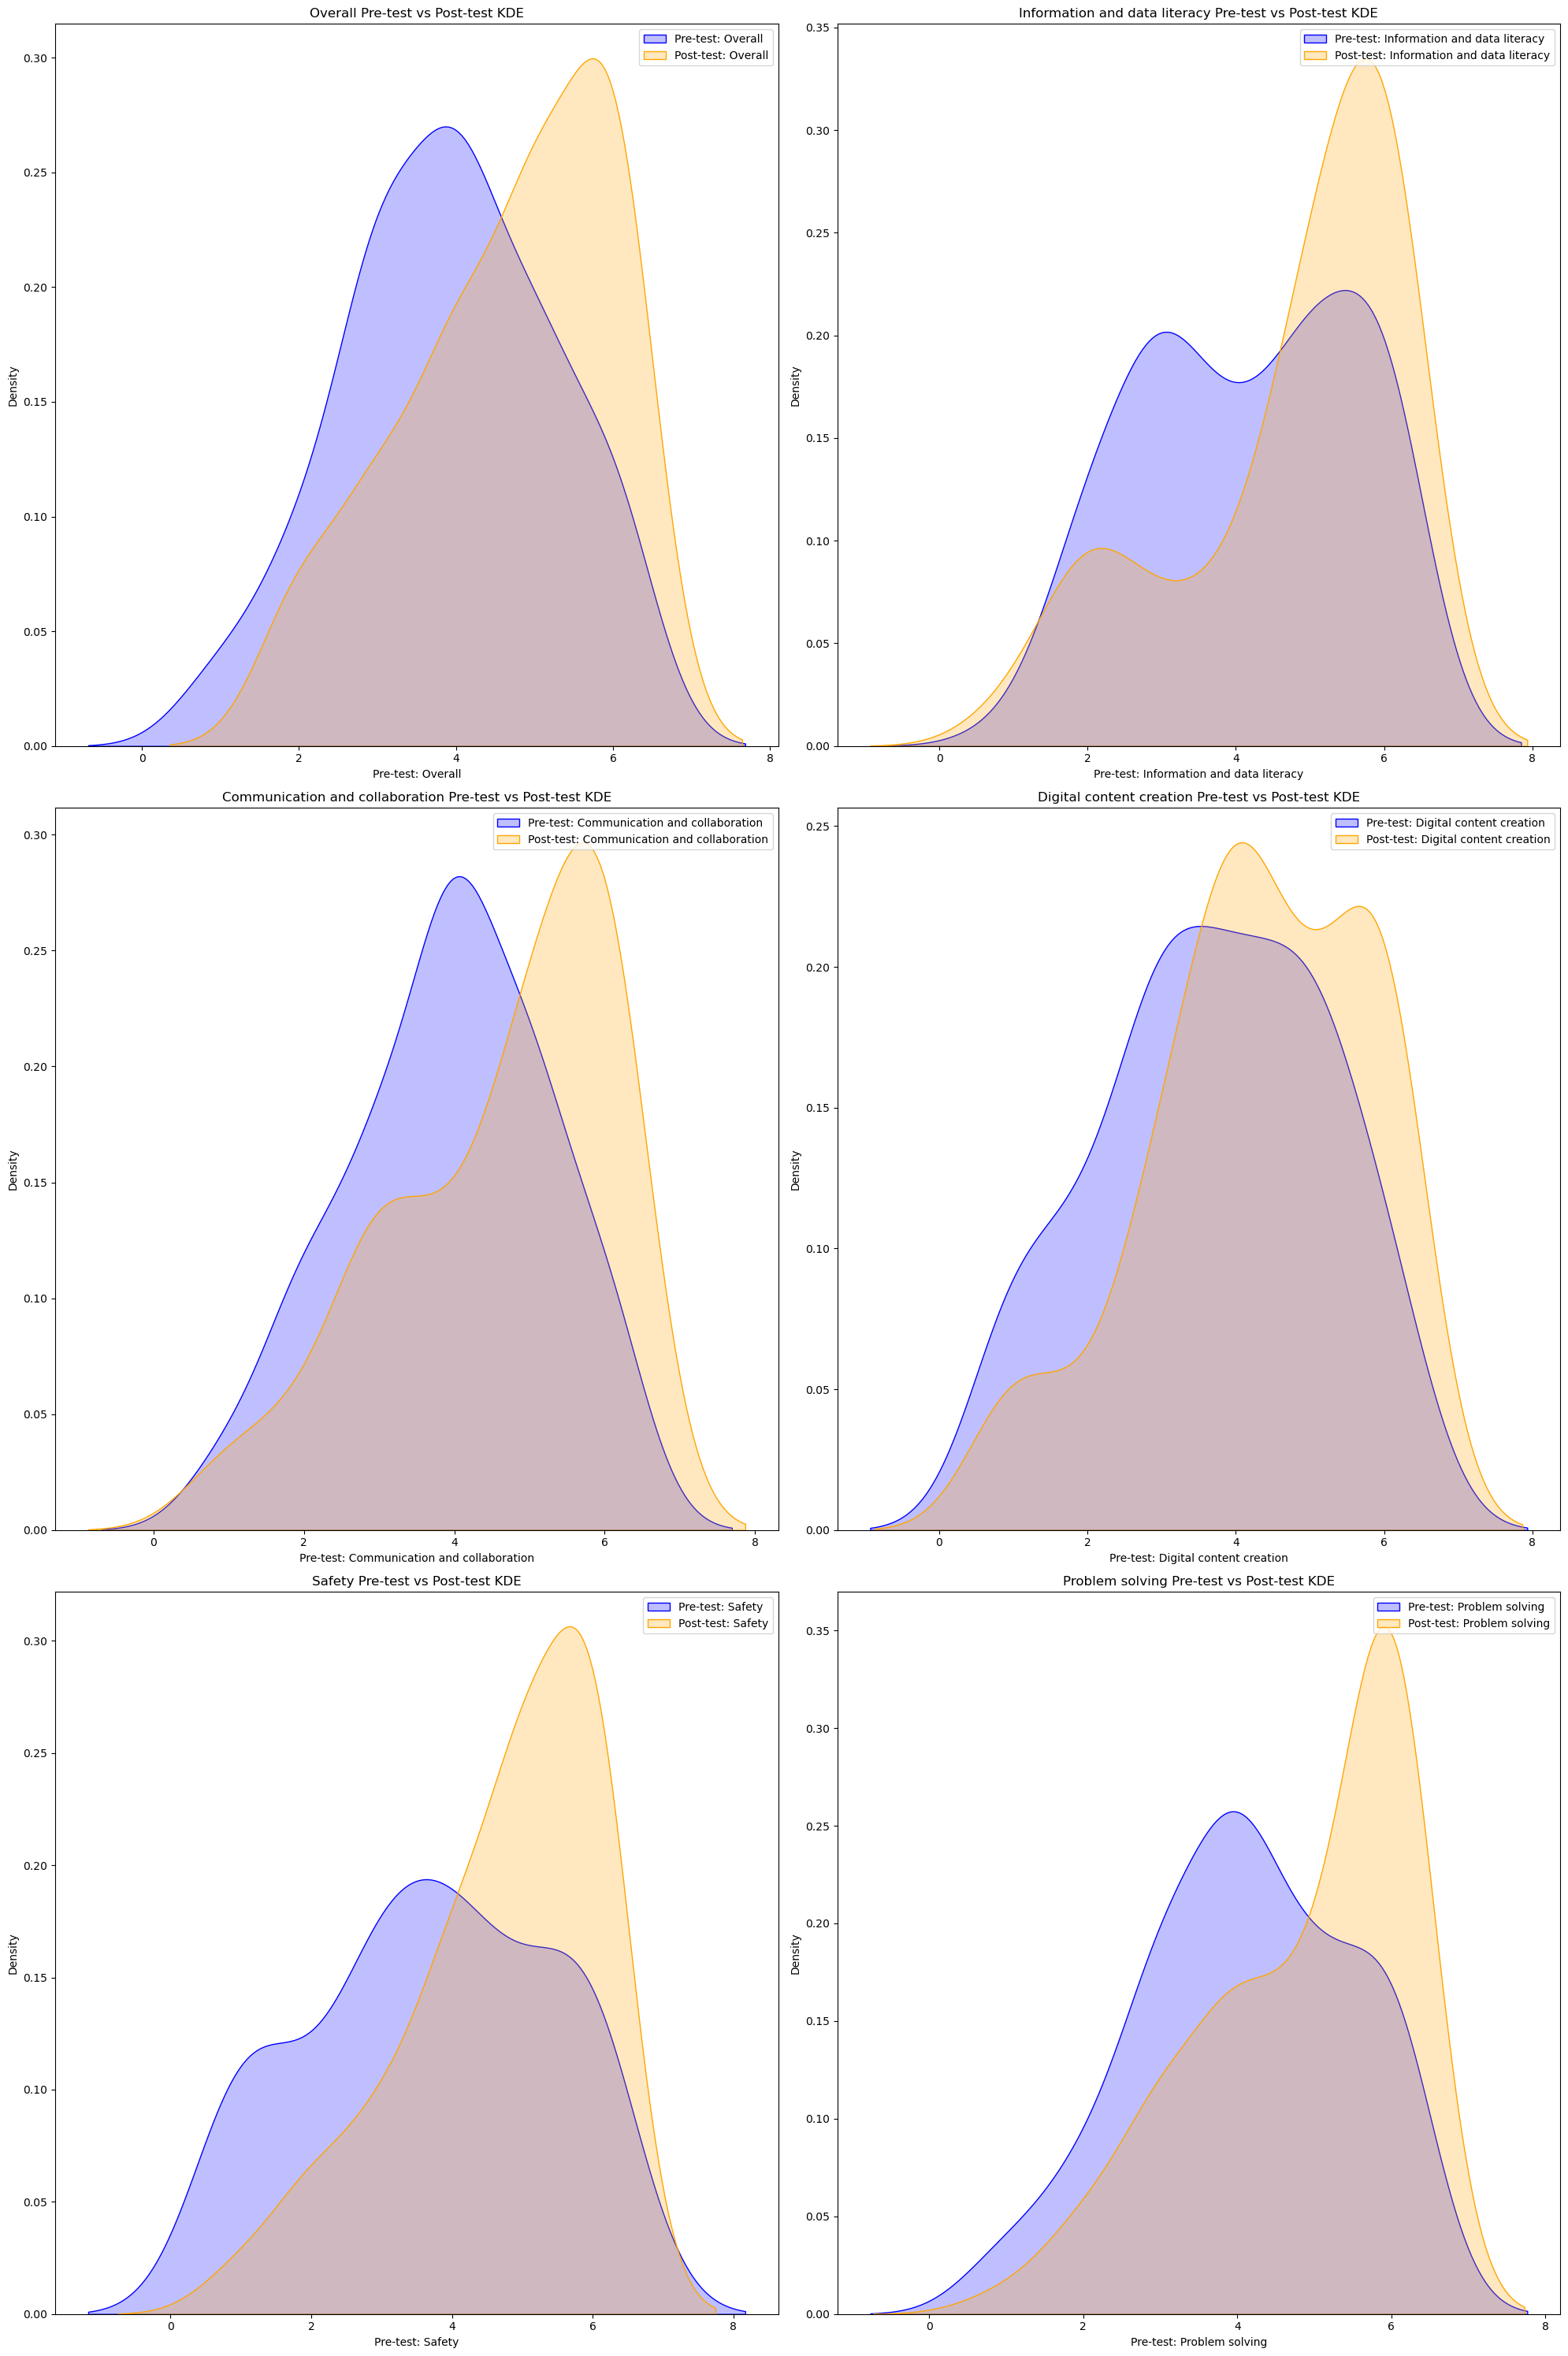

In [9]:
# Graphing the comparison using KDE diagrams
plt.figure(figsize=(20,30))

# Overall scores
plt.subplot(3, 2, 1)
sns.kdeplot(data=df_cleaned['Pre-test: Overall'], label='Pre-test: Overall', fill=True, color='blue')
sns.kdeplot(data=df_cleaned['Post-test: Overall'], label='Post-test: Overall', fill=True, color='orange')
plt.title('Overall Pre-test vs Post-test KDE')
plt.legend()

# Information and data literacy scores
plt.subplot(3,2,2)
sns.kdeplot(data=df_cleaned['Pre-test: Information and data literacy'], label='Pre-test: Information and data literacy', fill=True, color='blue')
sns.kdeplot(data=df_cleaned['Post-test: Information and data literacy'], label='Post-test: Information and data literacy', fill=True, color='orange')
plt.title('Information and data literacy Pre-test vs Post-test KDE')
plt.legend()

# Communication and collaboration scores
plt.subplot(3,2,3)
sns.kdeplot(data=df_cleaned['Pre-test: Communication and collaboration'], label='Pre-test: Communication and collaboration', fill=True, color='blue')
sns.kdeplot(data=df_cleaned['Post-test: Communication and collaboration'], label='Post-test: Communication and collaboration', fill=True, color='orange')
plt.title('Communication and collaboration Pre-test vs Post-test KDE')
plt.legend()

# Digital content creation scores
plt.subplot(3,2,4)
sns.kdeplot(data=df_cleaned['Pre-test: Digital content creation'], label='Pre-test: Digital content creation', fill=True, color='blue')
sns.kdeplot(data=df_cleaned['Post-test: Digital content creation'], label='Post-test: Digital content creation', fill=True, color='orange')
plt.title('Digital content creation Pre-test vs Post-test KDE')
plt.legend()

# Safety scores
plt.subplot(3,2,5)
sns.kdeplot(data=df_cleaned['Pre-test: Safety'], label='Pre-test: Safety', fill=True, color='blue')
sns.kdeplot(data=df_cleaned['Post-test: Safety'], label='Post-test: Safety', fill=True, color='orange')
plt.title('Safety Pre-test vs Post-test KDE')
plt.legend()

# Problem solving scores
plt.subplot(3,2,6)
sns.kdeplot(data=df_cleaned['Pre-test: Problem solving'], label='Pre-test: Problem solving', fill=True, color='blue')
sns.kdeplot(data=df_cleaned['Post-test: Problem solving'], label='Post-test: Problem solving', fill=True, color='orange')
plt.title('Problem solving Pre-test vs Post-test KDE')
plt.legend()

plt.tight_layout()
plt.show()


##### Graphs suggest improvements in each category, suggesting students have increased their knowledge about each aspect tested. For clearer conclusions, let us perform T-tests* for each category.

##### *T-test is representing how much did the 2 averages (means) change, taking into acount the data size and variability

In [10]:
# Performing independent t-test

group1 = df_cleaned['Pre-test: Overall']
group2 = df_cleaned['Post-test: Overall']

t_statistic, p_value = stats.ttest_ind(group1, group2)

# Results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('The increase in Overall mean is statistically significant.')
else:
    print('The increase in Overall mean is not statistically significant.')

T-statistic: -3.4771534626693223
P-value: 0.0006703226626541533
The increase in Overall mean is statistically significant.


#### Results
##### T-test along with graph depiction suggests that students performed better during the Post-test compared to the Pre-test. The significant increase implies a low likelihood of randomness.

### Conclusion
#### The results allow interpreting the data as follows: Students significantly increased their digital skills after the completion of the course.

## Part 02.
### 2.1.
### Can we say anything about the people who improved the most? (are there any characteristics about them that we can identify?)

In [11]:
# First, we need to identify people who improved the most
# For that we need to add column  'Test difference' and make its value equal to the difference between the Post-test and Pre-test Overall score
df_cleaned.insert(loc=0, column='Test difference', value=0)
df_cleaned.loc[:, 'Test difference'] = df_cleaned['Post-test: Overall'] - df_cleaned['Pre-test: Overall']

In [12]:
# Next lets create a dataset containing only the top 10 students in terms of test score improvement
# For that we need to re-sort the data by 'Test difference' first and 'Overall' second, then cut the first 10 rows
df2_1 = df_cleaned[['Test difference','Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project', 'Overall']].sort_values(by=['Test difference','Overall'], ascending=False).head(10)
df2_1

,Test difference,Attendance,Reflections,Assignments,Final test,Final project,Overall
56,4,19,12.7,28.1,7.0,19.7,86.5
47,4,19,20.0,27.3,6.6,11.4,84.3
8,4,20,16.3,27.0,5.3,12.5,81.1
53,4,20,18.1,25.9,4.3,9.6,77.9
0,3,19,18.1,27.3,7.5,14.5,86.4
61,3,16,16.3,26.5,4.5,19.7,83.0
2,3,16,18.1,24.3,6.6,10.3,75.3
68,3,14,16.3,26.2,6.0,11.7,74.2
24,2,20,18.1,28.6,7.3,15.3,89.3
48,2,20,18.1,27.5,7.6,15.0,88.2


In [13]:
# Let us see the basic statistic of the new and original datasets
df2_1.describe()

,Test difference,Attendance,Reflections,Assignments,Final test,Final project,Overall
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.200000,18.300000,17.210000,26.870000,6.270000,13.970000,82.620000
std,0.788811,2.162817,1.959847,1.221156,1.207431,3.578656,5.345154
min,2.000000,14.000000,12.700000,24.300000,4.300000,9.600000,74.200000
25%,3.000000,16.750000,16.300000,26.275000,5.475000,11.475000,78.700000
50%,3.000000,19.000000,18.100000,27.150000,6.600000,13.500000,83.650000
75%,4.000000,20.000000,18.100000,27.450000,7.225000,15.225000,86.475000
max,4.000000,20.000000,20.000000,28.600000,7.600000,19.700000,89.300000


In [14]:
df_cleaned[['Test difference','Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project', 'Overall']].describe()

,Test difference,Attendance,Reflections,Assignments,Final test,Final project,Overall
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.753425,16.753425,17.241096,25.936986,6.676712,13.612329,80.220548
std,1.331048,4.129100,2.710414,3.734319,1.343247,3.731247,11.570736
min,-1.000000,0.000000,7.200000,12.700000,1.800000,2.600000,39.200000
25%,0.000000,16.000000,16.300000,24.500000,6.000000,11.700000,74.200000
50%,0.000000,19.000000,18.100000,27.000000,7.000000,14.200000,83.000000
75%,1.000000,20.000000,20.000000,28.600000,7.600000,16.100000,88.200000
max,4.000000,20.000000,20.000000,30.000000,9.000000,19.700000,97.200000


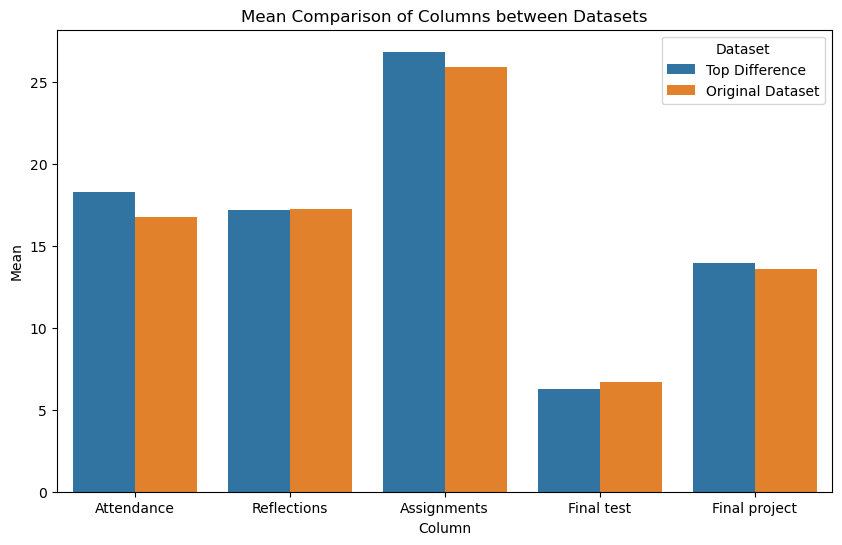

In [27]:
# Next, let us create a graph depicting mean (average) values of each category for a better visual depiction of dataset
means1 = df2_1.drop(columns=['Test difference', 'Overall']).mean() # Getting rid of 'Test difference' and 'Overall' colums not to overload the dataset
means2 = df_cleaned[['Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project']].mean()

# Create a DataFrame for plotting
mean_df = pd.DataFrame({'Top Difference': means1, 'Original Dataset': means2}).reset_index()
mean_df = mean_df.melt(id_vars='index', var_name='Dataset', value_name='Mean')
mean_df.rename(columns={'index': 'Column'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Mean', hue='Dataset', data=mean_df)
plt.title('Mean Comparison of Columns between Datasets')
plt.show()

##### The plot depicts certain difference in Attendance and Assignments scores, therefore let us conduct a t-test on those values

In [16]:
# Performing independent t-test for Attendance scores

group1 = df_cleaned['Attendance']
group2 = df2_1['Attendance']

t_statistic, p_value = stats.ttest_ind(group1, group2)

# Results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('The increase in Attendance mean is statistically significant.')
else:
    print('The increase in Attendance mean is not statistically significant.')

T-statistic: -1.1584891619778606
P-value: 0.25006869511681495
The increase in Attendance mean is not statistically significant.


In [17]:
# Performing independent t-test for Assignment scores

group1 = df_cleaned['Assignments']
group2 = df2_1['Assignments']

t_statistic, p_value = stats.ttest_ind(group1, group2)

# Results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('The increase in Assignments mean is statistically significant.')
else:
    print('The increase in Assignments mean is not statistically significant.')

T-statistic: -0.7807138148521388
P-value: 0.4372465303767197
The increase in Assignments mean is not statistically significant.


#### Results
##### T-test along with graph depiction does not suggest any difference between top students in terms of 'Test difference' and the original dataset

### Conclusion
#### The absence of any significant difference between the 2 groups can be interpreted as follows:
#### 1) The small size of the data cannot draw the clear difference between 2 groups
#### 2) The course is designed in a way that: it measures aspects different from the test OR allows student to subvert the design OR students are dishonest taking the test
#### The analysis does not allow to define any unique characteristics for students who improved their score the most

### 2.2
### Can we say anything about the people who have high digital skills (from the post-test)? (are there any characteristics about them that we can identify?)

In [18]:
# To answer this question, we will use the same approach as for the previous one, with minor differences
# First, we do not need to create new columns, as all the columns we needs to perform the analysis are already present in the original dataset
# The dataset will be sorted by the 'Post-test: Overall' score first, 'Overall' score second
df2_2 = df_cleaned[['Post-test: Overall','Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project', 'Overall']].sort_values(by=['Post-test: Overall', 'Overall'], ascending=False).head(10)
df2_2

,Post-test: Overall,Attendance,Reflections,Assignments,Final test,Final project,Overall
87,6.0,20,20.0,30.0,8.0,19.2,97.2
64,6.0,20,20.0,29.4,8.3,13.6,91.3
34,6.0,19,20.0,29.4,7.3,15.3,91.0
19,6.0,16,20.0,27.2,8.3,17.7,89.2
20,6.0,16,18.1,28.6,8.3,16.7,87.7
25,6.0,19,16.3,27.2,7.1,17.7,87.3
89,6.0,20,17.2,29.4,4.6,16.1,87.3
56,6.0,19,12.7,28.1,7.0,19.7,86.5
7,6.0,19,20.0,27.0,6.3,13.5,85.8
63,6.0,20,14.5,29.4,7.0,13.6,84.5


In [19]:
df2_2.describe()

,Post-test: Overall,Attendance,Reflections,Assignments,Final test,Final project,Overall
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.0,18.800000,17.880000,28.570000,7.220000,16.310000,88.780000
std,0.0,1.549193,2.661161,1.117587,1.151617,2.297559,3.655984
min,6.0,16.000000,12.700000,27.000000,4.600000,13.500000,84.500000
25%,6.0,19.000000,16.525000,27.425000,7.000000,14.025000,86.700000
50%,6.0,19.000000,19.050000,29.000000,7.200000,16.400000,87.500000
75%,6.0,20.000000,20.000000,29.400000,8.225000,17.700000,90.550000
max,6.0,20.000000,20.000000,30.000000,8.300000,19.700000,97.200000


In [20]:
df_cleaned[['Post-test: Overall','Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project', 'Overall']].describe()

,Post-test: Overall,Attendance,Reflections,Assignments,Final test,Final project,Overall
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,4.657534,16.753425,17.241096,25.936986,6.676712,13.612329,80.220548
std,1.293350,4.129100,2.710414,3.734319,1.343247,3.731247,11.570736
min,2.000000,0.000000,7.200000,12.700000,1.800000,2.600000,39.200000
25%,4.000000,16.000000,16.300000,24.500000,6.000000,11.700000,74.200000
50%,5.000000,19.000000,18.100000,27.000000,7.000000,14.200000,83.000000
75%,6.000000,20.000000,20.000000,28.600000,7.600000,16.100000,88.200000
max,6.000000,20.000000,20.000000,30.000000,9.000000,19.700000,97.200000


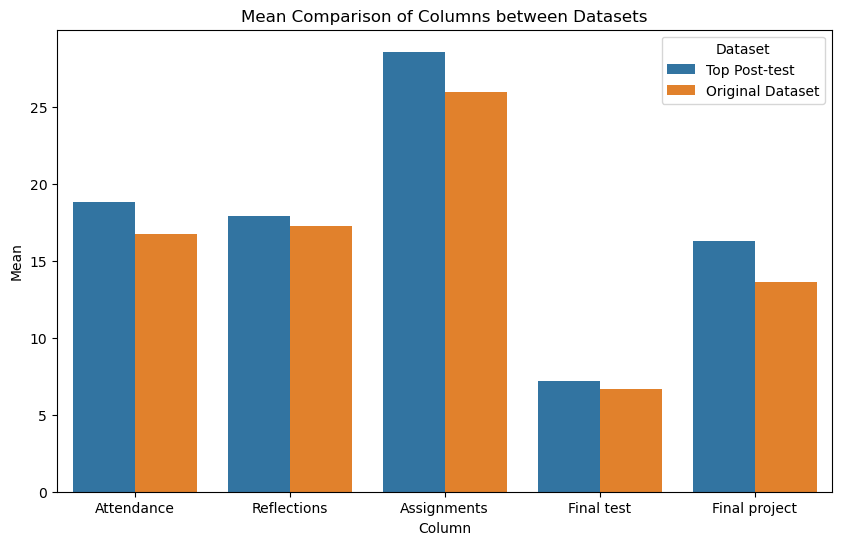

In [28]:
# Now, let us create a similar graph depicting mean (average) values for each category
means1 = df2_2.drop(columns=['Post-test: Overall', 'Overall']).mean() # Getting rid of 'Post-test: Overall' and 'Overall' colums not to overload the dataset
means2 = df_cleaned[['Attendance', 'Reflections',
       'Assignments', 'Final test', 'Final project']].mean()

# Create a DataFrame for plotting
mean_df = pd.DataFrame({'Top Post-test': means1, 'Original Dataset': means2}).reset_index()
mean_df = mean_df.melt(id_vars='index', var_name='Dataset', value_name='Mean')
mean_df.rename(columns={'index': 'Column'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Mean', hue='Dataset', data=mean_df)
plt.title('Mean Comparison of Columns between Datasets')
plt.show()

##### The graph suggests checking the significant difference of means of Attendance, Assignments, and Final Project scores 

In [22]:
# Performing independent t-test for Attendance scores

group1 = df_cleaned['Attendance']
group2 = df2_2['Attendance']

t_statistic, p_value = stats.ttest_ind(group1, group2)

# Results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('The increase in Attendance mean is statistically significant.')
else:
    print('The increase in Attendance mean is not statistically significant.')

T-statistic: -1.5455508930585427
P-value: 0.12611132418267382
The increase in Attendance mean is not statistically significant.


In [23]:
# Performing independent t-test for Assignments scores

group1 = df_cleaned['Assignments']
group2 = df2_2['Assignments']

t_statistic, p_value = stats.ttest_ind(group1, group2)

# Results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('The increase in Assignments mean is statistically significant.')
else:
    print('The increase in Assignments mean is not statistically significant.')

T-statistic: -2.2055794892159546
P-value: 0.030247433292230546
The increase in Assignments mean is statistically significant.


In [24]:
# Performing independent t-test for Final project scores

group1 = df_cleaned['Final project']
group2 = df2_2['Final project']

t_statistic, p_value = stats.ttest_ind(group1, group2)

# Results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print('The increase in Final project mean is statistically significant.')
else:
    print('The increase in Final project mean is not statistically significant.')

T-statistic: -2.2221752767638687
P-value: 0.029060238716924074
The increase in Final project mean is statistically significant.


#### Results
##### T-test along and graphs suggest significant difference in Final project and Assignment scores between top students in the Post-test: Overall score and the original dataset

### Conclusion
#### The results can be interpreted as follows: Students with Top scores on Post-test tend tp be characterized with higher scores in Assignments and Final project

## Part 03.
### How well do the digital skills post-test, DIQ test, and overall course grade correlate with each other?

In [25]:
# Since the Overall score is partially based on the Final test score, let us make a new column, which includes value of overall score withot the final test
df.insert(loc=0, column='Overall - Final Test', value=0)
df.loc[:, 'Overall - Final Test'] = df['Overall'] - df['Final test']

# This new value will be further refered to as Overall

<Axes: >

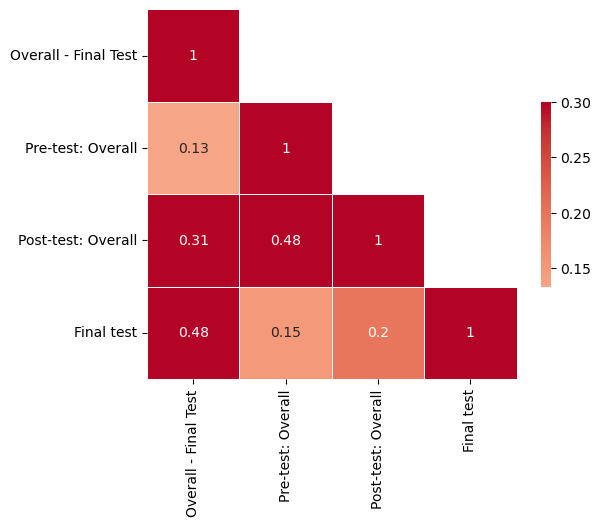

In [26]:
c = df[['Overall - Final Test','Pre-test: Overall','Post-test: Overall',
       'Final test']].corr()
mask = np.triu(np.ones_like(c, dtype=bool), k=1)
sns.heatmap(c, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True)

#### Results
##### The correlation matrix suggests a significant correlation between:
##### 1)  Pre-test and Post-test overall scores
##### 2)  Overall and Post-test overall scores
##### 3)  Overall and Final test

### Conclusion
#### The correlation matrix allow the following interpretation:
#### 1) Students score on the Pre-test correlates with the Post-test score, suggesting that initial digital skills play significant role in their further developed, in other words, the better the original skills are, the better they can become;
#### 2) Correlation between Post-test score and Overall score suggests that the developed digital skills of students played role in their performance in class
#### 3) Overall and Final test correlation: understanding of the subject is affecting the overall score

## Part 04.
### Summary

#### This analysis has utilized various data analytics and statistics techniques and tools to work with provided data and answer the stated questions, bringing up the conclusions:
##### 1) Students had an increase there digital skills at the end of the course compared to its beginning;
##### 2.1) There are no specific characteristics of students who improved their score the most;
##### 2.2) Students with highest Post-test score tend to perform better during Assignments and Final project;
##### 3) There are correlations between Pre-test and Post-test overall scores, Overall and Post-test overall scores, Overall and Final test.

### Special thanks to professor Daniel Corks (the instructor for IT for Business course) for providing this data 